In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [3]:
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [4]:
ab_testing = pd.read_csv("C:/Users/carla/OneDrive/Desktop/proyecto final/ab_testing.csv")

In [5]:
print(ab_testing)

      User ID Group  Page Views  Time Spent Conversion   Device  \
0       14292     B           3         424         No   Mobile   
1       11682     A           9         342         No   Mobile   
2       19825     A           2         396         No  Desktop   
3       16080     B           4         318         No  Desktop   
4       18851     A           1         338        Yes  Desktop   
...       ...   ...         ...         ...        ...      ...   
4995    16360     B          12         313         No   Mobile   
4996    18084     B          10         313         No  Desktop   
4997    12063     A          11         156         No  Desktop   
4998    18647     B          13         346         No  Desktop   
4999    16686     A          11         208         No  Desktop   

              Location  
0     Northern Ireland  
1             Scotland  
2     Northern Ireland  
3                Wales  
4             Scotland  
...                ...  
4995             Wal

In [6]:
print(ab_testing.isnull().sum())

User ID       0
Group         0
Page Views    0
Time Spent    0
Conversion    0
Device        0
Location      0
dtype: int64


In [7]:
ab_testing['Conversion'] = ab_testing['Conversion'].map({'Yes': 1, 'No': 0})

In [8]:
print(ab_testing)

      User ID Group  Page Views  Time Spent  Conversion   Device  \
0       14292     B           3         424           0   Mobile   
1       11682     A           9         342           0   Mobile   
2       19825     A           2         396           0  Desktop   
3       16080     B           4         318           0  Desktop   
4       18851     A           1         338           1  Desktop   
...       ...   ...         ...         ...         ...      ...   
4995    16360     B          12         313           0   Mobile   
4996    18084     B          10         313           0  Desktop   
4997    12063     A          11         156           0  Desktop   
4998    18647     B          13         346           0  Desktop   
4999    16686     A          11         208           0  Desktop   

              Location  
0     Northern Ireland  
1             Scotland  
2     Northern Ireland  
3                Wales  
4             Scotland  
...                ...  
4995    

In [9]:
print(ab_testing['Group'].unique())

['B' 'A']


In [10]:
print(ab_testing)

      User ID Group  Page Views  Time Spent  Conversion   Device  \
0       14292     B           3         424           0   Mobile   
1       11682     A           9         342           0   Mobile   
2       19825     A           2         396           0  Desktop   
3       16080     B           4         318           0  Desktop   
4       18851     A           1         338           1  Desktop   
...       ...   ...         ...         ...         ...      ...   
4995    16360     B          12         313           0   Mobile   
4996    18084     B          10         313           0  Desktop   
4997    12063     A          11         156           0  Desktop   
4998    18647     B          13         346           0  Desktop   
4999    16686     A          11         208           0  Desktop   

              Location  
0     Northern Ireland  
1             Scotland  
2     Northern Ireland  
3                Wales  
4             Scotland  
...                ...  
4995    

In [11]:
print(ab_testing['Device'].unique())

['Mobile' 'Desktop']


In [12]:
print(ab_testing)

      User ID Group  Page Views  Time Spent  Conversion   Device  \
0       14292     B           3         424           0   Mobile   
1       11682     A           9         342           0   Mobile   
2       19825     A           2         396           0  Desktop   
3       16080     B           4         318           0  Desktop   
4       18851     A           1         338           1  Desktop   
...       ...   ...         ...         ...         ...      ...   
4995    16360     B          12         313           0   Mobile   
4996    18084     B          10         313           0  Desktop   
4997    12063     A          11         156           0  Desktop   
4998    18647     B          13         346           0  Desktop   
4999    16686     A          11         208           0  Desktop   

              Location  
0     Northern Ireland  
1             Scotland  
2     Northern Ireland  
3                Wales  
4             Scotland  
...                ...  
4995    

In [14]:
conversion_rates = ab_testing.groupby('Group')['Conversion'].mean()
print(conversion_rates)

Group
A    0.053990
B    0.140669
Name: Conversion, dtype: float64


#gráfico de barras para comparar la tasa de conversión de los grupos A y B:

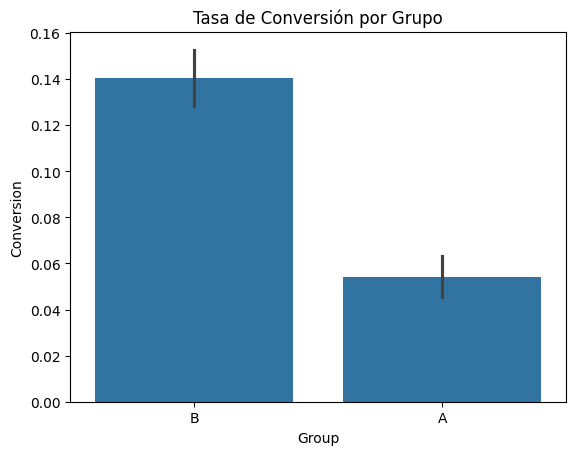

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Group', y='Conversion', data=ab_testing)
plt.title('Tasa de Conversión por Grupo')
plt.show()

#prueba estadistica

In [16]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(ab_testing['Group'], ab_testing['Conversion'])
chi2, p, _, _ = chi2_contingency(contingency)
print(f'Valor p: {p}')

Valor p: 6.571736018334222e-25


In [ ]:
#la conclusion es que el valor de p la diferencia es estadisticamente significativa

# Análisis por subgrupos (segmentación)
#Ver si el grupo B funciona mejor solo en celulares o en ciertas regiones.

In [19]:
ab_testing.groupby(['Group', 'Device'])['Conversion'].mean().unstack()   




Device,Desktop,Mobile
Group,,
A,0.058682,0.049412
B,0.139104,0.142376


#Tasa de conversión por ubicación:

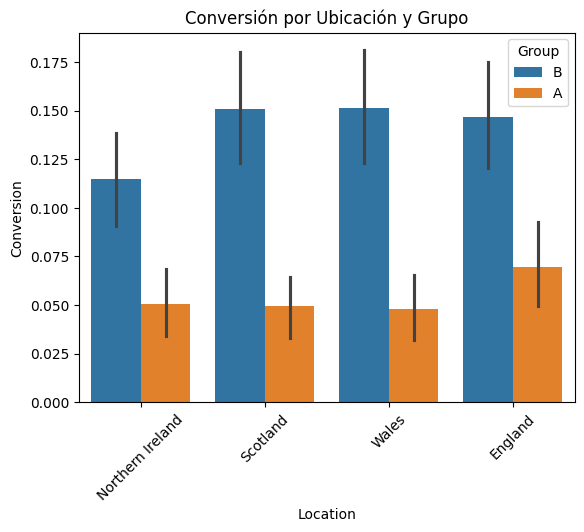

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Location', y='Conversion', hue='Group', data=ab_testing)
plt.xticks(rotation=45)
plt.title('Conversión por Ubicación y Grupo')
plt.show()

#Boxplot del tiempo en el sitio por grupo: Visualizar diferencias puede revelar comportamientos escondidos entre grupos

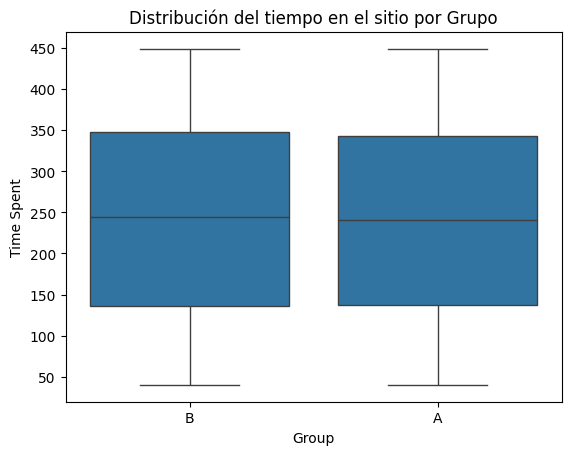

In [21]:
sns.boxplot(x='Group', y='Time Spent', data=ab_testing)
plt.title('Distribución del tiempo en el sitio por Grupo')
plt.show()

In [ ]:
#Modelado simple: regresión logística
Podés crear un modelo para predecir si un usuario convierte según su grupo, dispositivo, tiempo en sitio, etc.

In [29]:
print(X.dtypes)

const                        float64
Page Views                     int64
Time Spent                     int64
Group_B                         bool
Device_Mobile                   bool
Location_Northern Ireland       bool
Location_Scotland               bool
Location_Wales                  bool
dtype: object


In [30]:
import pandas as pd
import statsmodels.api as sm

In [32]:
ab_testing_model = ab_testing.copy()

In [33]:
ab_testing_model = pd.get_dummies(ab_testing_model, columns=['Group', 'Device', 'Location'], drop_first=True)

In [34]:
ab_testing_model['Conversion'] = ab_testing_model['Conversion'].astype(int)


In [35]:
X = ab_testing_model.drop(columns=['User ID', 'Conversion'])
y = ab_testing_model['Conversion']

In [36]:
X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)


In [37]:
X = sm.add_constant(X)

In [40]:
logit_model = sm.Logit(y, X).fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).